<div style="display: flex; background-color: RGB(96,120,144);" >
<h1 style="margin: auto; padding: 30px; ">DETECTEZ DES FAUX BILLETS AVEC PYTHON MODELISATION</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Notre entreprise nous mandate pour une mission de Data analyse au sein de l’Organisation nationale de lutte contre le faux-monnayage (ONCFM).

L'ONCFM a pour enjeux la lutte contre la contrefaçon et met en place à juste titre des méthodes d’identification des faux billets.
C'est dans ce contexte et dans un soucis d'efficacité, qu'il nous est demandé de développer une application de Machine Learning afin de faire des prédictions sur la nature de billets scannés (en tenant compte de certaines caractéristiques) à destination des équipes. 

En termes de méthodologie, nous avons à disposition un jeu de données contenant diverses billets pour lesquels nous avons les caractéristiques dimensionnelles ainsi que l'authenticité. Notre travail se déroulera donc comme suit :
- Une analyse exploratoire des données
- Une analyse univariée des données
- Une analyse bivariée des données 
- Les tests avec les algorithmes
- L'algorithme retenu

.


<div style="background-color: RGB(202,204,182);" >
<h2 style="margin: auto; padding: 30px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

# 1.1 - Importation des librairies

In [1]:
# Data Science et visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import plotly.express as px
import sklearn as sk

# Tests statistiques
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats

# Machine Learning
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.stats import boxcox, yeojohnson
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler


import joblib

# 1.2 - Chargements des fichiers

In [2]:
#Importation du fichier Billet
df_billets = open('billets.csv')
data1 = pd.read_csv(df_billets, encoding='utf-8', delimiter=';')
display(data1)



is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1500 rows x 7 columns]

<div style="background-color: RGB(202,204,182);" >
<h2 style="margin: auto; padding: 30px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

*PARTIE RESERVEE A LA COMPREHENSION ET AU PRE-TRAITEMENT DES DONNEES*

In [3]:
#Affichage des dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(data1.shape[0]))
print("Le tableau comporte {} colonne(s)".format(data1.shape[1]))

Le tableau comporte 1500 observation(s) ou article(s)
Le tableau comporte 7 colonne(s)


In [4]:
#La nature des données dans chacune des colonnes
print(data1.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print(data1.info())


is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB
None


In [5]:
# Affichage du nombre de valeurs uniques
data1.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

In [6]:
# Affichage du nombre de valeurs manquantes
data1.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [7]:
# Valeurs manquantes pourcentage
part_valeur_manquante = ((data1.isnull().sum() / len(data1)) * 100)
print(part_valeur_manquante)

is_genuine      0.000000
diagonal        0.000000
height_left     0.000000
height_right    0.000000
margin_low      2.466667
margin_up       0.000000
length          0.000000
dtype: float64


**Notre Dataset présente 7 colonnes et 1500 lignes ou échantillons , avec 1 variable qualitative et 6 autres quantitatives**

**La colonne margin low contient 37 valeurs manquantes, soit 2.5% du dataset.**


Les dimensions de notre jeu de données sont les suivantes ainsi que leurs significations :
- length : la longueur du billet (en mm) 
- height_left  :  la  hauteur  du  billet  (mesurée  sur  le  côté  gauche,  en mm)
- height_right : la hauteur du billet (mesurée sur le côté droit, en mm)
- margin_up  :  la  marge  entre  le  bord  supérieur  du  billet  et  l'image  de celui-ci (en mm)
- margin_low  :  la  marge  entre  le  bord  inférieur  du  billet  et  l'image  de celui-ci (en mm)
- diagonal : la diagonale du billet (en mm)

# 2.1 Traitement des valeurs manquantes

Lorsqu’il est question de données manquantes pour une variable donnée, on a 3 stratégies possibles :

-Ignorer et supprimer tous les échantillons pour lesquels cette valeur manque

-Remplacer les valeurs manquantes par une valeur spécifique qui indique que la valeur n'est pas disponible

-Inférer les valeurs manquantes à partir des valeurs disponibles, voire des autres variables

Afin de traiter les valeurs manquantes de la colonne margin low, nous opterons pour la construction d'une régression linéaire à partir des autres variables

"L'objectif d'une régression linéaire simple est de prédire la valeur d'une variable dépendante en fonction d'une variable indépendante. Plus la relation linéaire entre la variable indépendante et la variable dépendante est grande, plus la prédiction est précise.

 Plus la relation linéaire entre les variables dépendantes et indépendantes est importante, plus les points de données se situent sur une ligne droite."

In [8]:
# Création d'une copie du DataFrame sans valeurs manquantes
data1_sans_na = data1.loc[
    ~data1.isna().any(axis='columns')].copy()

display(data1_sans_na)

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1463 rows x 7 columns]

In [9]:
# Affichage du nombre d'enregistrements 
print(f'Dimensions : {data1_sans_na.shape}')

# Vérification des valeurs manquantes
print(f'Valeur(s) manquante(s) : {data1_sans_na.isna().any().any()}')

Dimensions : (1463, 7)
Valeur(s) manquante(s) : False


## Analyse Bivariée

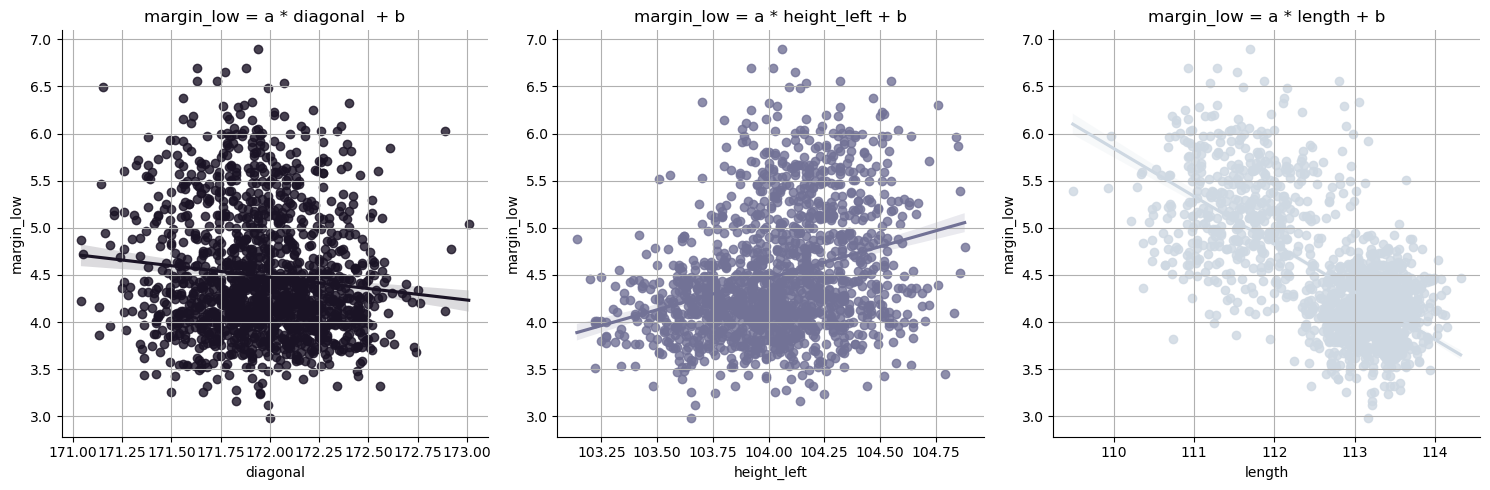

In [10]:
# Représentation graphique
fig1, ax1 = plt.subplots(1,3, figsize = (15,5))

plt.subplot(1,3,1)
sns.regplot(x = data1_sans_na[['diagonal']],y  =  data1_sans_na.margin_low, color='#1A1325')
plt.ylabel('margin_low')
plt.xlabel('diagonal')
plt.title('margin_low = a * diagonal  + b')
plt.grid()
sns.despine()

plt.subplot(1,3,2)
sns.regplot(x = data1_sans_na[['height_left']],y  =  data1_sans_na.margin_low, color='#727296')
plt.ylabel('margin_low')
plt.xlabel('height_left')
plt.title('margin_low = a * height_left + b')
plt.grid()
sns.despine()

plt.subplot(1,3,3)
res = sns.regplot(x = data1_sans_na[['length']],y  =  data1_sans_na.margin_low, color='#CED8E2')
plt.ylabel('margin_low')
plt.xlabel('length')
plt.title('margin_low = a * length + b')
plt.grid()
sns.despine()



plt.tight_layout()
plt.show()

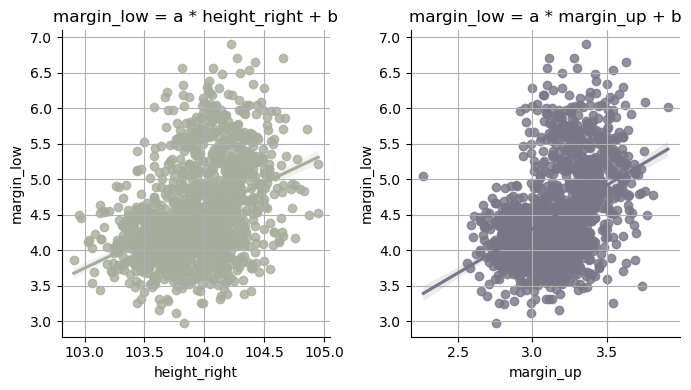

In [11]:
# Représentation graphique
fig2, ax2 = plt.subplots(1,2, figsize = (7,4))


plt.subplot(1,2,1)
res = sns.regplot(x = data1_sans_na[['height_right']],y  =  data1_sans_na.margin_low, color='#A7AD9C')
plt.ylabel('margin_low')
plt.xlabel('height_right')
plt.title('margin_low = a * height_right + b')
plt.grid()
sns.despine()

plt.subplot(1,2,2)
res = sns.regplot(x = data1_sans_na[['margin_up']],y  =  data1_sans_na.margin_low, color='#797687')
plt.ylabel('margin_low')
plt.xlabel('margin_up')
plt.title('margin_low = a * margin_up + b')
plt.grid()
sns.despine()

plt.tight_layout()
plt.show()

**Visuellement, on ne semble pas repérer une forte corrélation entre la variable cible margin_low et les autres variables prédictrices**

In [12]:
# Calcul de la matrice de corrélation
corr_matrix = data1_sans_na[['diagonal','height_left','height_right','margin_low','margin_up','length']].corr()
corr_matrix

diagonal  height_left  height_right  margin_low  margin_up  \
diagonal      1.000000     0.018265     -0.019428   -0.111534  -0.059147   
height_left   0.018265     1.000000      0.235132    0.302643   0.243812   
height_right -0.019428     0.235132      1.000000    0.391085   0.306867   
margin_low   -0.111534     0.302643      0.391085    1.000000   0.431606   
margin_up    -0.059147     0.243812      0.306867    0.431606   1.000000   
length        0.100758    -0.314344     -0.404272   -0.666753  -0.521139   

                length  
diagonal      0.100758  
height_left  -0.314344  
height_right -0.404272  
margin_low   -0.666753  
margin_up    -0.521139  
length        1.000000

C:\Users\Daniela\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


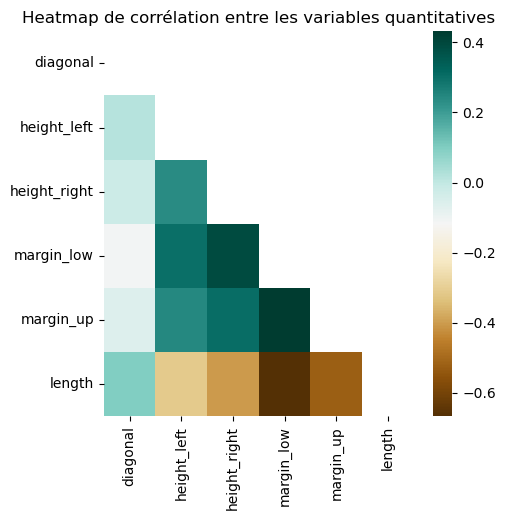

In [13]:
# Affichage de la matrice de corrélation
plt.figure(figsize=(5, 5))
mask = np.triu(np.ones_like(corr_matrix.corr()))

# Affichage de la matrice de corrélation sous forme de heatmap avec seaborn
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap="BrBG", fmt=".2f")
plt.title('Heatmap de corrélation entre les variables quantitatives')
plt.show()

**Margin low est plutôt quasi fortement corrélée négativement à length (-0.66) et dans une plus faible mesure moyennement corrélée à Margin up (0.43).**

## Regression linéaire

**Scindons le dataset en une partie entraînement (80%) et une partie test (20%). On prends 1170 échantillons pour entraîner le modèle et on met 293 échantillons de coté pour l'évaluer.**

In [14]:
# Choix du Modèle 
reg = LinearRegression()

In [15]:
# Séparation du Dataset
X = data1_sans_na[['diagonal','height_left','height_right','margin_up','length']]
y = data1_sans_na.margin_low

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
# Ajustement et Entrainement du modele
reg.fit(X_train, y_train)

LinearRegression()

Pour estimer la performance sur le sous-ensemble de test il faut tout d'abord obtenir les prédictions pour X_test:

In [17]:
y_pred_test = reg.predict(X_test)

On peut maintenant calculer l'écart entre les vraies valeurs de test (y_test) et celles prédites par le modèle.


Utilisons la RMSE et la MAPE comme score. Pour ces 2 métriques, un score plus petit correspond à un meilleur modèle.

MAPE est compris entre 0 et 1, tandis que RMSE n'est pas contraint.

In [18]:
# Scores
print(f"MSE: {mean_squared_error(y_test, y_pred_test)}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_test, squared=False)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")
print(f"R2: {r2_score(y_test, y_pred_test)}")

MSE: 0.19144954947493334
RMSE: 0.4375494823159243
MAPE: 0.07467677345733457
R2: 0.5457956683532407


**Le R2 indique que le modèle explique moyennement la variance : il explique 55% des variations de  margin_low.**


**Le carré moyen des erreurs (MSE) est plutôt proche de 0 ce qui est une bonne chose car c'est l'une des valeurs que l'on cherche à minimiser dans le cadre d'une régression.**

## Vérification des hypothèses du modèles

Vérifications des hypothèses concernant les résidus.

In [19]:
# Calcul des résidus
residuals = y_test - y_pred_test

### 1.Vérification de l'homoscédasticité

L'homoscédasticité significie que la variance des résidus est constante

Néanmoins, nous allons réaliser le test statistique de Breush-Pagan dont les hypothèses sont les suivantes :

- H0 : l’homoscédasticité est présente si p-value > 5%
- H1 : l’homoscédasticité n’est pas présente si p-value < 5 %

In [20]:
# Test de Breush-Pagan
res = het_breuschpagan(residuals, X_test.assign(constant=1))
print(f'p-value : {res[1]:.3e}')


p-value : 3.906e-03


**Le test indique que l'homoscédasticité n'est pas présente.**

### 2.Normalité des résidus

Les valeurs des résidus doivent suivre une loi normale. On trace la distribution des résidus.

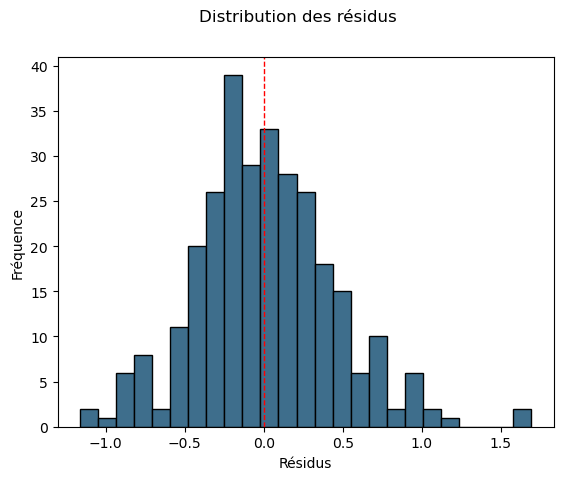

In [21]:
# Graphique
fig3, ax3 = plt.subplots()

ax3.hist(x=residuals, bins=25, color="#3E6E8C", edgecolor='k')
ax3.axvline(x=0, linestyle='--', linewidth=1, color='r')

ax3.set_xlabel('Résidus')
ax3.set_ylabel('Fréquence')
fig3.suptitle('Distribution des résidus')

plt.show()

del fig3, ax3

Nous allons réaliser un test de Shapiro-Wilk ayant les hypothèses suivantes :

- H0 : La normalité est vérifiée si p-value > 5 % ;
- H1 : La normalité n'est pas vérifiée si p-value < 5 %.

In [22]:
# Test de Shapiro-Wilk
res = stats.shapiro(residuals)
print(f'p-value : {res.pvalue:.3e}')

del res

p-value : 3.898e-03


**Le test indique que la normalité n'est pas présente.**

**Nous avons parmi les 2 premières assertions, l'une qui n'est pas validée.**

**Nous pouvons donc réfléchir à une tâche de transformation de  notre jeu de données afin de valider l'homoscédasticité.**

#### La transformation de Box-Cox
"La puissance de Box-Cox est une technique qui est utile lorsque les données ont une distribution non normale. Box-Cox utilise une transformation de puissance pour créer une distribution plus normale en ajustant la valeur de lambda.

Avantages de la transformation de Box-Cox :
- Crée une distribution plus normale des données
- La valeur optimale de lambda est choisie automatiquement pour maximiser la vraisemblance.

Inconvénients de la transformation de Box-Cox : 
- Ne peut être appliquée qu'aux données positives.
- Si lambda est proche de zéro, la transformation est similaire à une transformation logarithmique, ce qui peut avoir des effets indésirables sur les données.
- Si lambda est très grand, la transformation peut être instable."



**Nous ne pouvons pas retenir ce modèle puisque nous avons des données négatives. Il existe toutefois d'autres transformations :  Yeo-Johnson, logarithmique, puissance...**

#### La transformation de Yeo-Johnson

La transformation de Yeo-Johnson est une technique similaire à la transformation de Box-Cox, mais elle peut être utilisée pour des distributions non normales et avec des valeurs négatives. Yeo-Johnson applique une transformation qui est une combinaison de la transformation de puissance et de la transformation logarithmique. Comme pour Box-Cox, l'algorithme choisit automatiquement la transformation optimale pour maximiser la vraisemblance.

avec une formule où y est la variable à transformer et lambda est la valeur qui maximise la vraisemblance.

Avantages de la transformation de Yeo-Johnson
- Peut être utilisée pour des distributions non normales et avec des valeurs négatives.
- Comme pour Box-Cox, la valeur optimale de lambda est choisie automatiquement pour maximiser la vraisemblance.

Inconvénients de la transformation de Yeo-Johnson
- Peut être plus lente à calculer que la transformation de Box-Cox.
- La transformation peut être instable pour certaines valeurs de lambda.

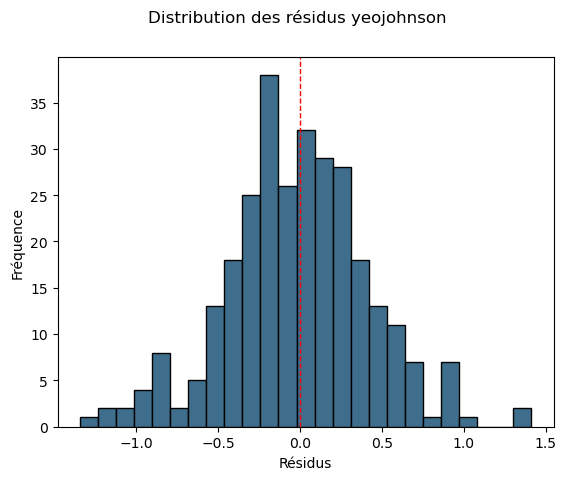

In [23]:
# Transformation de Yeo-Johnson à la variable x
x_yeojohnson, lambda_yeojohnson = yeojohnson(residuals)

# Histogramme de la variable transformée
fig4, ax4 = plt.subplots()

ax4.hist(x=x_yeojohnson, bins=25, color="#3E6E8C", edgecolor='k')
ax4.axvline(x=0, linestyle='--', linewidth=1, color='r')

ax4.set_xlabel('Résidus')
ax4.set_ylabel('Fréquence')
fig4.suptitle('Distribution des résidus yeojohnson')

plt.show()

del fig4, ax4

In [24]:
# Test de Shapiro-Wilk
res_1 = stats.shapiro(x_yeojohnson)
print(f'p-value : {res_1.pvalue:.3e}')

p-value : 1.790e-01


**Normalité des données transformées vérifiée**

**Nous n'irons pas jusqu'au bout de la démarche mais nous décidons d'utiliser tout de même les données initiales de  notre dataset pour alimenter nos modèles de Machine Learning.**

### 3.Indépendance des résidus


Les résidus ne doivent pas être liés c’est-à-dire que la valeur d’un résidu ne doit pas nous permettre de connaître celui d’un autre. 

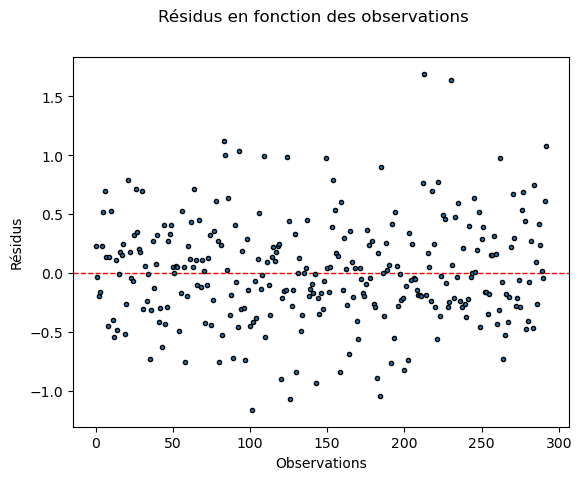

In [25]:
# Graphique
fig5, ax5 = plt.subplots()

ax5.scatter(x=range(len(residuals)), y=residuals, marker='.',
           edgecolors='k')
ax5.axhline(y=0, color='r', linestyle='--', linewidth=1, zorder=0)

ax5.set_xlabel('Observations')
ax5.set_ylabel('Résidus')
fig5.suptitle('Résidus en fonction des observations')

plt.show()

del fig5, ax5

Les résidus semblent répartis de manière aléatoire autour de 0. Pour confimer notre observation, on réalise un test de Durbin-Watson. Cette statistique est comprise entre 0 et 4 :

- si sa valeur est proche de 0, il y a une autocorrélation positive ;
- si sa valeur est située autour de 2, il n'y a pas d’autocorrélation ;
- si sa valeur est proche de 4, il y a une autocorrélation négative.

In [26]:
# Calcul et affichage du résultat du test de Durbin-Watson
res = durbin_watson(residuals)
print(f'Durbin-Watson : {res:.3f}')

del res

Durbin-Watson : 1.938


**La valeur est proche de 2, il y a donc indépendance des résidus.**

**Il y'a une corrélation modérée avec lenght qui ne nécessite pas d'attention particulière**

## Prédiction des valeurs manquantes


Grâce au modèle mis en place, on prédit les valeurs manquantes des enregistrements incomplets puis on reconstitue le jeu de données complet.

In [27]:
# Affichage du Dataset
data1_sans_na

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1463 rows x 7 columns]

In [28]:
# Copie des enregistrements contenant les valeurs manquantes
df_billets_na = data1[data1.isna().any(axis='columns')].copy()
df_billets_na

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413         True    172.30       103.66        103.50         NaN       3.16   
445         True    172.34       104.42        103.22         NaN       3.01   
481         True    171.81       103.53        103.96         NaN       2.71   
505         True    172.01       103.97        104.05         NaN       2.98   
611         True    171.80       103.68        103.49         NaN       3.30   
654         True    171.97       103.69        103.54         NaN       2.70   
675         True    171.60       103.85        103.91         NaN       2.56   
710         True    172.03       103.97        103.86         NaN       3.07   
739         True    172.07       103.74        103.76         NaN       3.09   
742         True    172.14       104.06        103.96         NaN       3.24   
780         True    172.41       103.95        103.79         NaN       3.13   
798         True    171.96       103.84        103.62         NaN       3.01   
844         True    171.62       104.14        104.49         NaN       2.99   
845         True    172.02       104.21        104.05         NaN       2.90   
871         True    171.37       104.07        103.75         NaN       3.07   
895         True    171.81       103.68        103.80         NaN       2.98   
919         True    171.92       103.68        103.45         NaN       2.58   
945         True    172.09       103.74        103.52         NaN       3.02   
946         True    171.63       103.87        104.66         NaN       3.27   
981         True    172.02       104.23        103.72         NaN       2.99   
1076       False    171.57       104.27        104.44         NaN       3.21   
1121       False    171.40       104.38        104.19         NaN       3.17   
1176       False    171.59       104.05        103.94         NaN       3.02   
1303       False    172.17       104.49        103.76         NaN       2.93   
1315       False    172.08       104.15        104.17         NaN       3.40   
1347       False    171.72       104.46        104.12         NaN       3.61   
1435       False    172.66       104.33        104.41         NaN       3.56   
1438       False    171.90       104.28        104.29         NaN       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

In [29]:
# Prédiction des valeurs manquantes grâce au modèle
df_billets_na['margin_low'] = reg.predict(
    df_billets_na.drop(columns=['is_genuine', 'margin_low']))

display(df_billets_na)

# Concatenation des enregistrements avec et sans valeurs manquantes
data2 = pd.concat([df_billets_na,data1_sans_na ])



is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45    4.323133       3.25   
99          True    171.93       104.07        104.18    4.393907       3.14   
151         True    172.07       103.80        104.38    4.416845       3.02   
197         True    171.45       103.66        103.80    4.337374       3.62   
241         True    171.83       104.14        104.06    4.634614       3.02   
251         True    171.80       103.26        102.82    3.815222       2.95   
284         True    171.92       103.83        103.76    4.190862       3.23   
334         True    171.85       103.70        103.96    4.133982       3.00   
410         True    172.56       103.72        103.51    4.156725       3.12   
413         True    172.30       103.66        103.50    4.179140       3.16   
445         True    172.34       104.42        103.22    4.168849       3.01   
481         True    171.81       103.53        103.96    3.775417       2.71   
505         True    172.01       103.97        104.05    4.063689       2.98   
611         True    171.80       103.68        103.49    4.307835       3.30   
654         True    171.97       103.69        103.54    4.152929       2.70   
675         True    171.60       103.85        103.91    4.073864       2.56   
710         True    172.03       103.97        103.86    4.437730       3.07   
739         True    172.07       103.74        103.76    4.474235       3.09   
742         True    172.14       104.06        103.96    4.349957       3.24   
780         True    172.41       103.95        103.79    4.097550       3.13   
798         True    171.96       103.84        103.62    3.629682       3.01   
844         True    171.62       104.14        104.49    4.360967       2.99   
845         True    172.02       104.21        104.05    4.088648       2.90   
871         True    171.37       104.07        103.75    4.234759       3.07   
895         True    171.81       103.68        103.80    3.903429       2.98   
919         True    171.92       103.68        103.45    3.742329       2.58   
945         True    172.09       103.74        103.52    4.242111       3.02   
946         True    171.63       103.87        104.66    4.711299       3.27   
981         True    172.02       104.23        103.72    4.131895       2.99   
1076       False    171.57       104.27        104.44    5.026958       3.21   
1121       False    171.40       104.38        104.19    4.774697       3.17   
1176       False    171.59       104.05        103.94    5.037325       3.02   
1303       False    172.17       104.49        103.76    5.013806       2.93   
1315       False    172.08       104.15        104.17    4.781467       3.40   
1347       False    171.72       104.46        104.12    5.698913       3.61   
1435       False    172.66       104.33        104.41    5.194886       3.56   
1438       False    171.90       104.28        104.29    5.121098       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

# 2.1 Analyse Descriptive sur le Dataset Final


In [30]:
# Affichage du Dataset
data2 = data2.reset_index()
data2_final = data2.drop(columns=['index'])
data2_final.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.94       103.89        103.45    4.323133       3.25   
1        True    171.93       104.07        104.18    4.393907       3.14   
2        True    172.07       103.80        104.38    4.416845       3.02   
3        True    171.45       103.66        103.80    4.337374       3.62   
4        True    171.83       104.14        104.06    4.634614       3.02   

   length  
0  112.79  
1  113.08  
2  112.93  
3  113.27  
4  112.36

In [31]:
# Affichage des infos du  Dataset
data2_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


**Il n'existe plus de valeurs manquantes dans notre dataset.**

<Axes: title={'center': 'Répartition des Tydes de données par Variables'}, ylabel='count'>

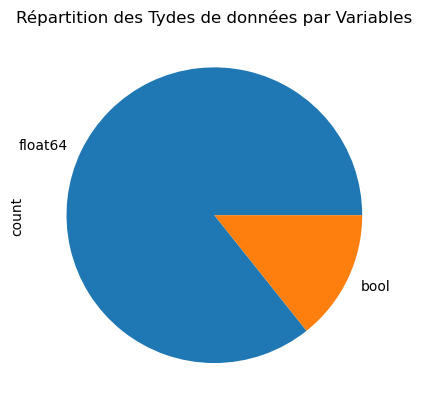

In [32]:
# Représentation des Types de données du dataset 
fig6 = data2_final.dtypes.value_counts().plot.pie()
plt.title("Répartition des Tydes de données par Variables")
fig6

### Examen de la colonne Cible

In [33]:
# Les valeurs de la colonne is_genuine
display(data2_final['is_genuine'].value_counts())

is_genuine
True     1000
False     500
Name: count, dtype: int64

1/3 des billets sont faux dans notre jeu de données.

In [34]:
par_categorie = data2_final.groupby(["is_genuine"])[["diagonal"]].count().reset_index()
par_categorie


is_genuine  diagonal
0       False       500
1        True      1000

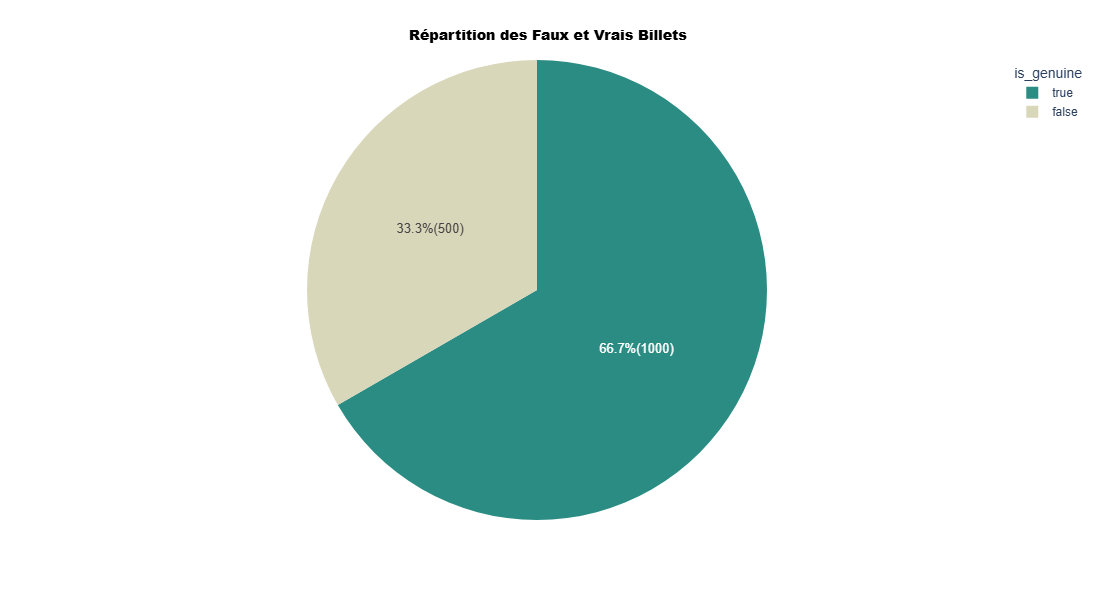

<Figure size 500x400 with 0 Axes>

In [35]:
plt.figure(figsize=(5,4))
color_discrete_map = {True : '#2A8C82', False: '#D9D7BA'}
s = pd.Series(color_discrete_map)
fig7 = px.pie(par_categorie, values='diagonal',  names='is_genuine', color='is_genuine',
              color_discrete_map=color_discrete_map)
fig7.update_layout(title_text="Répartition des Faux et Vrais Billets  ", 
                   titlefont=dict(size =14, color='black', family='Arial black'),
                   font_family="arial", 
                   width=700, height=600, legend_title_text="is_genuine",legend_traceorder="normal")  
fig7.update_traces(textfont_size=13, texttemplate= "%{percent}(%{value})", textposition='inside', textinfo='value+percent')

#Aligner le Titre
fig7.update_layout(
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig7.show()

<div style="background-color: RGB(202,204,182);" >
<h2 style="margin: auto; padding: 30px; color:#fff; ">Etape 3 - Analyse univariée</h2>
</div>

*PARTIE RESERVEE A LA SELECTION DES VARIABLES PERTINENTES*

In [36]:
# Statistiques du Dataframe
data2_final.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1500.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.483432     3.151473   
std       0.305195     0.299462      0.325627     0.659489     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.020000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

**Nous obtenons les statistiques sur l'ensemble du jeu de données, mais nous souhaitons affiner notre analyse pour voir les différences entre vrais et faux billets.**

In [37]:
# Affichage de la moyenne et la médiane des variables pour les vrais et faux billets
data2_final.groupby('is_genuine').agg({'median'}).round(3).stack()

diagonal  height_left  height_right  margin_low  margin_up  \
is_genuine                                                                      
False      median    171.91       104.18        104.16        5.18       3.35   
True       median    171.99       103.95        103.81        4.12       3.05   

                    length  
is_genuine                  
False      median  111.630  
True       median  113.205

**Ce sont les variables margin_low (1.06 de différence) et lenght (1.575 de différence) qui enregistrent les plus grands écarts en termes de médiane entre les vrais/faux billets**


In [38]:
# Affichage de la moyenne et la médiane des variables pour les vrais et faux billets
data2_final.groupby('is_genuine').agg({'mean'}).round(3).stack()

diagonal  height_left  height_right  margin_low  margin_up  \
is_genuine                                                                    
False      mean   171.901      104.190       104.144       5.214      3.350   
True       mean   171.987      103.949       103.809       4.118      3.052   

                  length  
is_genuine                
False      mean  111.631  
True       mean  113.202

**Ce sont les variables margin_low (1.09 de différence) et lenght (1.571 de différence) qui enregistrent les plus grands écarts en termes de moyenne entre les vrais et faux billets**


<div style="background-color: RGB(202,204,182);" >
<h2 style="margin: auto; padding: 30px; color:#fff; ">Etape 4 - Analyse bivariée</h2>
</div>

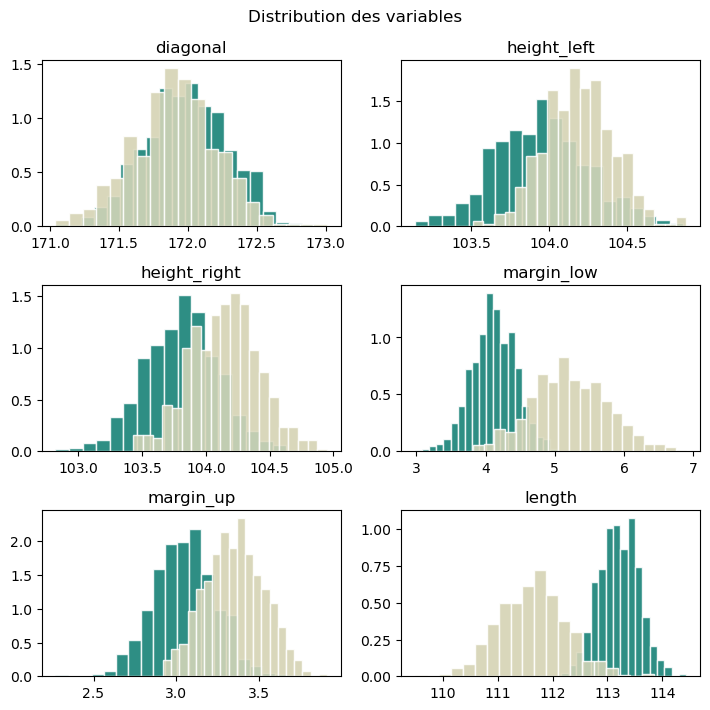

In [39]:
# Visualisation de la distribution des variables
is_genuine_values = data2_final['is_genuine'].unique()

fig8, axs = plt.subplots(3, 2, figsize=(7.2, 7.2))
axs = axs.flatten()

for i, column in enumerate(data2_final.columns[1:]):
    for j, is_genuine_value in enumerate(is_genuine_values):
        axs[i].hist(data2_final.loc[data2_final['is_genuine'] == True, column], color='#2A8C82', alpha=0.85, bins=20, edgecolor='w', density=True)
        axs[i].hist(data2_final.loc[data2_final['is_genuine'] == False, column], color='#D9D7BA', alpha=0.85, bins=20, edgecolor='w', density=True)
        axs[i].set_title(column)

fig8.suptitle('Distribution des variables')

fig8.tight_layout()

plt.show()

del is_genuine_values, fig8, axs, i, column, j, is_genuine_value

**L'analyse visuelle des distributions va dans le sens du constat partie analyse univariée : les distributions des  faux par rapport aux vrais billets sont plus décalées sur les variables length et margin low, et le moins sur diagonal**

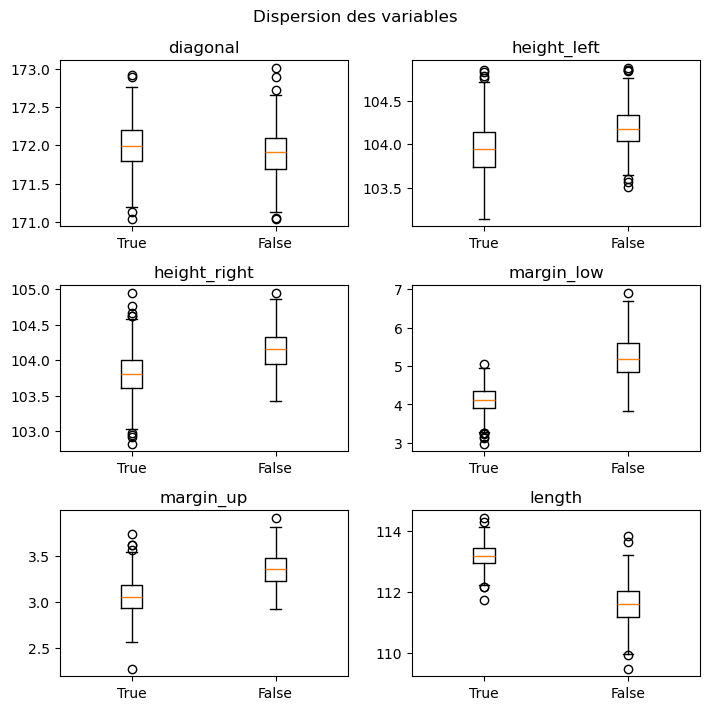

In [40]:
# Visualisation de la distribution des variables
is_genuine_values = data2_final['is_genuine'].unique()

# Trace les boxplots de chaque variable
fig9, axs = plt.subplots(3, 2, figsize=(7.2, 7.2))
axs = axs.flatten()

for i, column in enumerate(data2_final.columns[1:]):
    for j, is_genuine_value in enumerate(is_genuine_values):
        axs[i].boxplot(data2_final.loc[data2_final['is_genuine'] == is_genuine_value, column], positions=[j])
        axs[i].set_title(column)
        
    axs[i].set_xticklabels(is_genuine_values)

fig9.suptitle('Dispersion des variables')

fig9.tight_layout()

plt.show()

del is_genuine_values, fig9, axs, i, column, j, is_genuine_value

**Mise en évidence des répartitions et outliers**

In [41]:
# Calcul de la matrice de corrélation
corr_matrix_2 = data2_final.corr()
corr_matrix_2

is_genuine  diagonal  height_left  height_right  margin_low  \
is_genuine      1.000000  0.132756    -0.379833     -0.485092   -0.783342   
diagonal        0.132756  1.000000     0.019472     -0.024492   -0.110474   
height_left    -0.379833  0.019472     1.000000      0.242279    0.308940   
height_right   -0.485092 -0.024492     0.242279      1.000000    0.393433   
margin_low     -0.783342 -0.110474     0.308940      0.393433    1.000000   
margin_up      -0.606262 -0.055649     0.246522      0.307005    0.434437   
length          0.849285  0.097587    -0.320863     -0.401751   -0.670802   

              margin_up    length  
is_genuine    -0.606262  0.849285  
diagonal      -0.055649  0.097587  
height_left    0.246522 -0.320863  
height_right   0.307005 -0.401751  
margin_low     0.434437 -0.670802  
margin_up      1.000000 -0.520575  
length        -0.520575  1.000000

C:\Users\Daniela\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



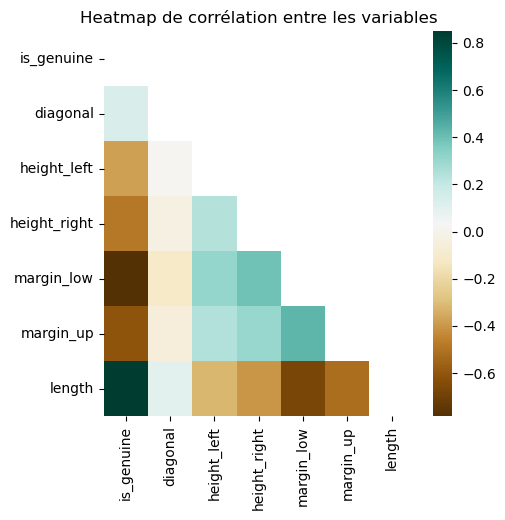

In [42]:
# Affichage de la matrice de corrélation
plt.figure(figsize=(5, 5))
mask_2 = np.triu(np.ones_like(corr_matrix_2))
# Affichage de la matrice de corrélation sous forme de heatmap avec seaborn
sns.heatmap(corr_matrix_2, annot=True, mask=mask_2, cmap="BrBG")
plt.title('Heatmap de corrélation entre les variables')
plt.show()

**La variable cible is_genuine est correlée très fortement avec :**

-**length(0.85)**

-**margin low (0.78)**

-**margin up (0.61)**

**et à l'inverse très faiblement avec diagonal (0.13)**


**On observe également que Margin low est fortement corrélée à length (-0.67)**

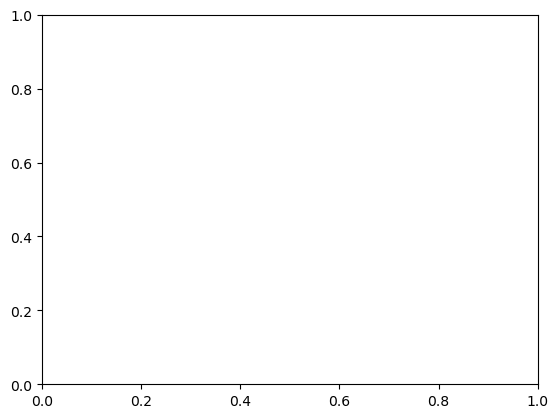

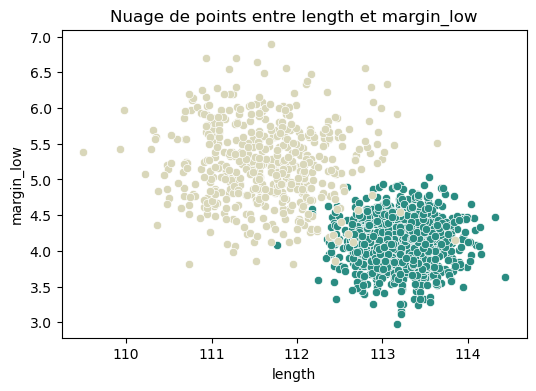

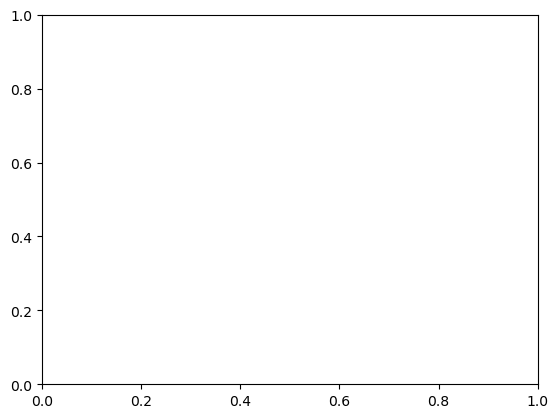

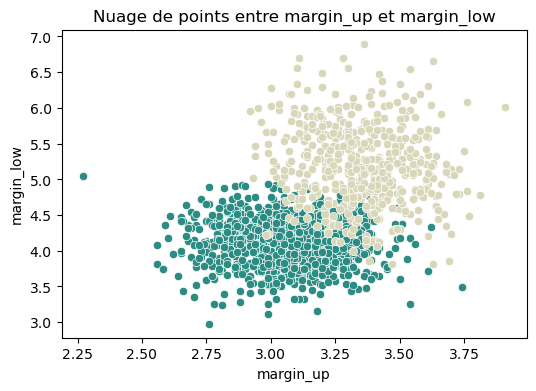

In [43]:
# Affichage des nuages de points entre margin low et length et margin up
target_col = "margin_low"
num_cols = ["length","margin_up"]

for col in num_cols:
    fig10, ax10 = plt.subplots()
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data2_final[data2_final['is_genuine'] == True], x=col, y=target_col, color="#2A8C82")
    sns.scatterplot(data=data2_final[data2_final['is_genuine'] == False], x=col, y=target_col, color="#D9D7BA")
    plt.title(f"Nuage de points entre {col} et {target_col}")
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.show()

del fig10, ax10

**Visuellement on observe au delà des relations entre les variables ceci :** 

- **Plus le margin up& margin low augmentent, et plus les billets sont faux**
- **Plus le lenght augmente et plus les billets sont vrais**

<div style="background-color: RGB(202,204,182);" >
<h2 style="margin: auto; padding: 30px; color:#fff; ">Etape 4 - Construction de l'algorithme</h2>
</div>

*PARTIE RESERVEE A L'ENTRAINEMENT DES 4 MODELES*

## ACP

Nous souhaitons ici visualiser les nuages de points ainsi que leurs centroids : étant donné que notre jeu de données contient 7 colonnes, celles-ci ne peuvent faire l'objet d'une représentation graphique que par le biais au préalable d'une ACP ou analyse en composantes principales.

In [44]:
# On normalise les données
dataframe = data2_final.drop(columns=['is_genuine'])

std_scale = sk.preprocessing.StandardScaler().fit(dataframe) # Fit des valeurs sur le modèle
data_std = pd.DataFrame(std_scale.transform(dataframe), columns=dataframe.columns) # Valeurs standardisées
data_std

diagonal  height_left  height_right  margin_low  margin_up    length
0    -0.060441    -0.466103     -1.444792   -0.243146   0.425168  0.127803
1    -0.093217     0.135176      0.797784   -0.135795  -0.049510  0.460204
2     0.365659    -0.766742      1.412188   -0.101002  -0.567341  0.288272
3    -1.666506    -1.234404     -0.369585   -0.221545   2.021814  0.677984
4    -0.420986     0.369007      0.429141    0.229317  -0.567341 -0.365069
...        ...          ...           ...         ...        ...       ...
1495 -0.683201     1.170713      0.767063   -0.096216  -0.265273 -1.602978
1496  0.758981     2.005822      1.596509    1.193091   0.942999 -1.958303
1497 -0.519316    -0.065250      0.613462    1.557131   0.899846 -0.835016
1498  0.332882     0.836669      0.429141    1.041408   1.331372 -0.491152
1499 -1.600953     0.402412     -0.308144    0.222319   0.942999 -0.697470

[1500 rows x 6 columns]

[ 43.  60.  73.  85.  95. 100.]


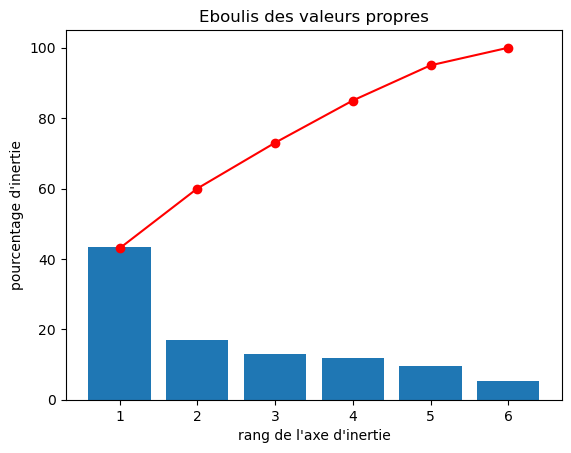

Variance expliquée : 100.0 %


In [45]:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(data_std)

#pca.explained_variance_ratio_

scree = (pca.explained_variance_ratio_*100).round(2)

scree_cum = scree.cumsum().round()
print(scree_cum)

x_list = range(1, n_components+1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)
print(
    'Variance expliquée :', 
    round(sum(pca.explained_variance_ratio_) * 100, 1), '%')

In [46]:
features = data2_final.drop(columns=['is_genuine']).columns

# Création du DataFrame des 4 premières composantes principales

pca = PCA(n_components=n_components)
data_acp = pca.fit_transform(data_std)
df_acp = pd.DataFrame(data_acp)

df_acp['is_genuine'] = data2_final['is_genuine']

df_acp.head(5)


0         1         2         3         4         5  is_genuine
0 -0.721514 -0.335023 -0.228926 -1.367259  0.099013  0.011016        True
1  0.033303  0.072674  0.113494  0.809540  0.395728  0.254701        True
2 -0.181201  0.285527 -0.806707  1.536468 -0.045240  0.056021        True
3  0.006302 -1.949617 -0.972615 -0.846509  1.755391  0.699329        True
4  0.385989 -0.267802  0.451523  0.563217 -0.459198 -0.229436        True

In [47]:
# Création du Dataframe des centroides
df_centroide = df_acp.groupby('is_genuine').mean()
df_centroide = df_centroide.reset_index()
df_centroide['is_genuine'] = df_centroide['is_genuine'].replace([True, False], 'centroide')
df_centroide

is_genuine         0         1         2         3         4         5
0  centroide  2.035696 -0.080205 -0.114214 -0.104188 -0.147139 -0.057489
1  centroide -1.017848  0.040103  0.057107  0.052094  0.073570  0.028744

In [48]:
# Concaténation des 2 DataFrame
df_acp = pd.concat([df_acp, df_centroide], ignore_index = False)
df_acp

0         1         2         3         4         5 is_genuine
0    -0.721514 -0.335023 -0.228926 -1.367259  0.099013  0.011016       True
1     0.033303  0.072674  0.113494  0.809540  0.395728  0.254701       True
2    -0.181201  0.285527 -0.806707  1.536468 -0.045240  0.056021       True
3     0.006302 -1.949617 -0.972615 -0.846509  1.755391  0.699329       True
4     0.385989 -0.267802  0.451523  0.563217 -0.459198 -0.229436       True
...        ...       ...       ...       ...       ...       ...        ...
1497  1.889884 -0.600321 -0.546328 -0.097991 -0.296977  0.503581      False
1498  1.789991  0.511113  0.027933 -0.473937  0.356686  0.524760      False
1499  1.042171 -1.471448  0.484630 -0.685097  0.484169 -0.234842      False
0     2.035696 -0.080205 -0.114214 -0.104188 -0.147139 -0.057489  centroide
1    -1.017848  0.040103  0.057107  0.052094  0.073570  0.028744  centroide

[1502 rows x 7 columns]

In [49]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('PC{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('PC{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (PC{} et PC{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

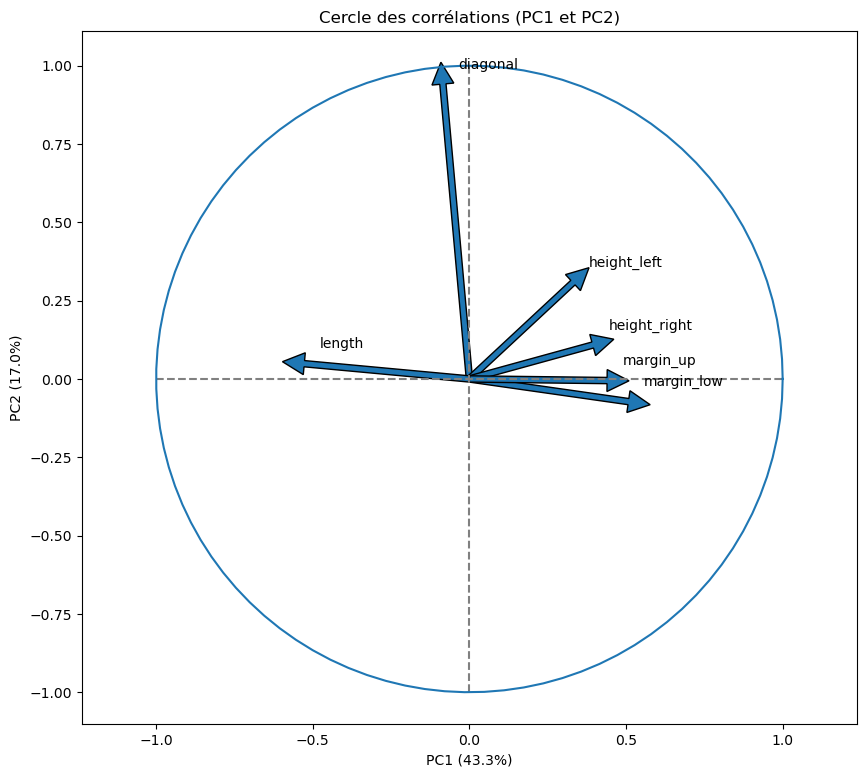

In [50]:
correlation_graph(pca, (0,1), features)

**Comme vu précèdemment,ce sont les variables length et margin_low qui sont les mieux représentées de par la longueur de leur flèches, et ce sont également  celles qui ont les plus forts coefficients de corrélation avec la composante F1.**

In [51]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette = 'bright')

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x+1} {v1}')
    ax.set_ylabel(f'PC{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur PC{x+1} et PC{y+1})")
    plt.show()

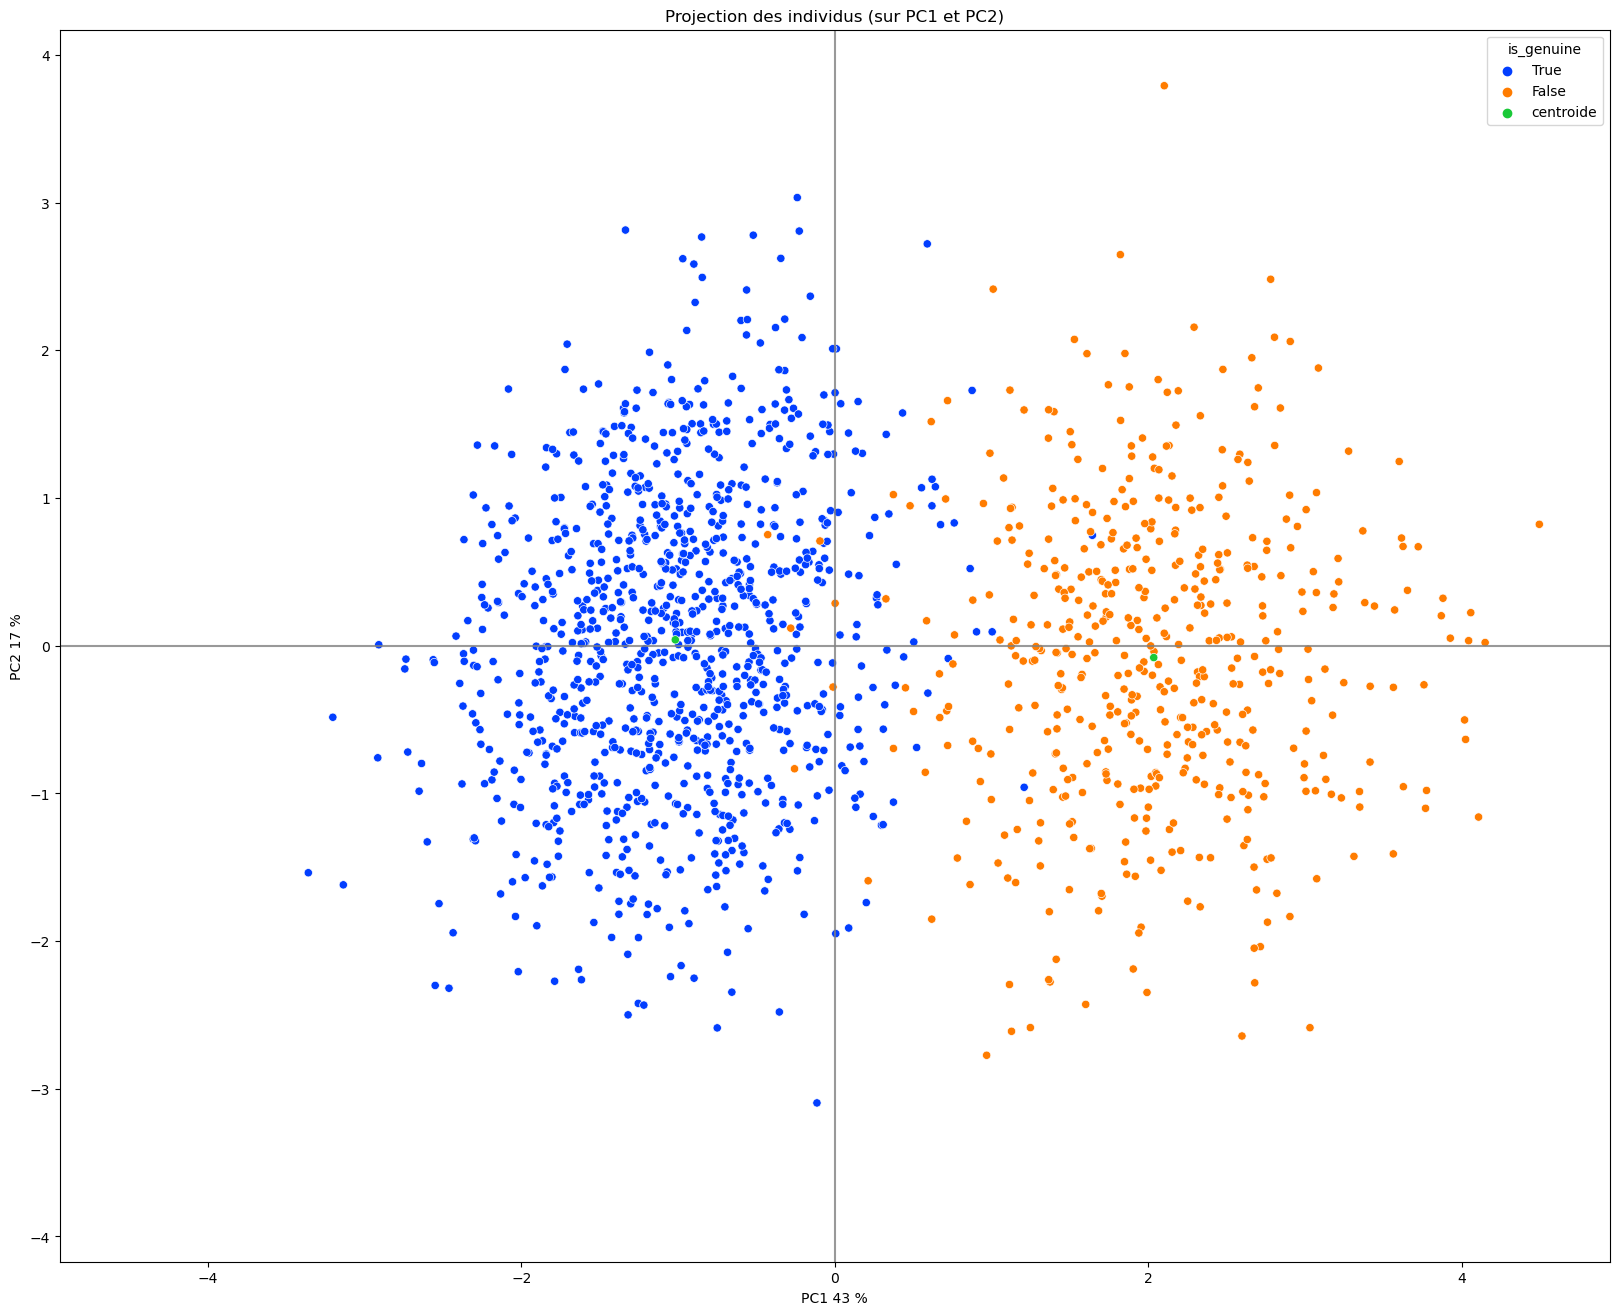

In [52]:
x_y = [0,1]
display_factorial_planes(df_acp, x_y, pca, figsize=(20,16), clusters=df_acp.is_genuine, marker="o")

**Nous distinguons bien les 2 clusters :**

-**à gauche les billets authentiques qui ont des length plus élevées**

-**à droite les faux billets qui ont des margin low et margin up élevés**

## Pre - Traitement

Les Modèles de ML n'acceptant que données d'entrée chiffrées, nous devons réaliser une étape de transformation dans la colonne is_genuine

In [53]:
# Tranformation 'is_genuine' avec les TRUE = 0
# Puisqu'il s'agit de détecter si un billet est faux il faut chager le nom de la colonne is_genuine
data2_final = data2_final.rename(columns={'is_genuine': 'is_false'})
data2_final['is_false'] = np.where(data2_final['is_false'] == True, 0, 1)


data2_final.head(5)

is_false  diagonal  height_left  height_right  margin_low  margin_up  \
0         0    171.94       103.89        103.45    4.323133       3.25   
1         0    171.93       104.07        104.18    4.393907       3.14   
2         0    172.07       103.80        104.38    4.416845       3.02   
3         0    171.45       103.66        103.80    4.337374       3.62   
4         0    171.83       104.14        104.06    4.634614       3.02   

   length  
0  112.79  
1  113.08  
2  112.93  
3  113.27  
4  112.36

In [54]:
# Définition de X et y
X = data2_final.drop(columns='is_false')
y = data2_final.is_false

# Séparation des données en entraînement et test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)


Train set: (1200, 6)
Test set: (300, 6)


Pour comparer les résultats des différentes méthodes de classification, nous pouvons définir une fonction qui va sauvegarder les métriques

In [55]:
def save_classifier_metrics(y_true, y_pred, clf_label, pos_label):
    '''Sauvegarde et affiche les métriques dans un dictionnaire.
    Paramètres :
    - y_true : la vraie valeur des labels
    - y_pred : les labels prédits par la méthode de classification
    - clf_label : le nom de la méthode de classification
    - pos_label : le label de la classe positive
    '''

    if not('clf_metrics_dict' in globals()):  
        global clf_metrics_dict
        clf_metrics_dict = {
            'accuracy': {}, 'precision': {}, 'recall': {}, 'f1-score': {}}
        
    clf_metrics_dict['accuracy'].update(
        {clf_label: metrics.accuracy_score(y_true, y_pred)})
    
    clf_metrics_dict['precision'].update(
        {clf_label: metrics.precision_score(
            y_true, y_pred, pos_label=pos_label)}
    )
    
    clf_metrics_dict['recall'].update(
        {clf_label: metrics.recall_score(
            y_true, y_pred, pos_label=pos_label)}
    )
    
    clf_metrics_dict['f1-score'].update(
        {clf_label: metrics.f1_score(
            y_true, y_pred, pos_label=pos_label)}
    )

    return pd.DataFrame(clf_metrics_dict)

## 4.1 Régression Logistique

"La régression logistique est un modèle statistique permettant d’étudier les relations entre un ensemble de variables qualitatives Xi et une variable qualitative Y.

Un modèle de régression logistique permet aussi de prédire la probabilité qu’un événement arrive (valeur de 1) ou non (valeur de 0) à partir de l’optimisation des coefficients de régression"

In [56]:
# Régression Logistique
clf_log_reg = LogisticRegression().fit(X_train, y_train)

# Prédiction sur les données test
y_pred = clf_log_reg.predict(X_test)

# Affichage des coefficients de la régression
for column, coef in zip(X.columns, clf_log_reg.coef_[0]):
    print(f'{column} : \t{coef:>9.6f}')

del column, coef

diagonal : 	 0.263634
height_left : 	 1.575068
height_right : 	 1.944509
margin_low : 	 3.480885
margin_up : 	 3.072037
length : 	-3.889511


In [57]:
# DataFrame avec la probabilité que le billet soit vrai ou faux
proba_dataframe = pd.DataFrame(clf_log_reg.predict_proba(X_test)).rename(columns={0: 'Faux Billets', 1: 'Vrais Billets'})

proba_dataframe

Faux Billets  Vrais Billets
0        0.082389       0.917611
1        0.001186       0.998814
2        0.994005       0.005995
3        0.999902       0.000098
4        0.960733       0.039267
..            ...            ...
295      0.999921       0.000079
296      0.999458       0.000542
297      0.028081       0.971919
298      0.081974       0.918026
299      0.997918       0.002082

[300 rows x 2 columns]

## Evaluation du Modèle

### Accuracy

In [58]:
print("accuracy",accuracy_score(y_test, y_pred))

accuracy 0.9966666666666667


**Très bon score : 99,7% de nos échantillons ont été correctement classés par le modèle**

### Matrice de confusion

Des notions : 

- Exactitude : mesure le pourcentage des actions correctement détectées.(vrais positifs + vrais négatifs) / (vrais positifs + vrais négatifs + faux positifs + faux négatifs)

- Rappel : Le taux de vrais positifs (TVP), ou la proportion de tous les résultats positifs réels qui ont été correctement classés comme tels, est également appelé rappel. vrais positifs  / (vrais positifs + faux négatifs)

- Précision : La précision correspond à la proportion de toutes les classifications positives du modèle qui sont réellement positives.  vrais positifs  / (vrais positifs + faux positifs)



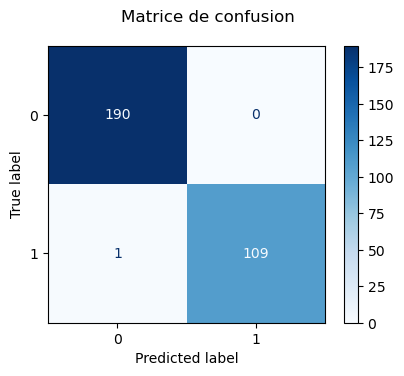

In [59]:
fig11, ax11= plt.subplots(figsize=(4.8, 3.6))

metrics.ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, ax=ax11, cmap='Blues')

fig11.suptitle('Matrice de confusion')

plt.show()

del fig11, ax11

La matrice de confusion dit ceci :

- Les vrais positifs : pour 109 billets, nous avons correctement prédit qu'ils sont faux. 
- Les vrais négatifs : pour 190 billets, nous avons correctement prédit qu'ils sont authentiques. 
- Les faux positifs : absent.
- Les faux négatifs : pour 1 billet, nous avons prédit à tort qu'il est authentique.

### Seuil de séparation des classes

Comparons la matrice de confusion et les scores obtenus pour differents seuil de classification

In [60]:
# Probabilité de la classe 1
y_hat_proba = clf_log_reg.predict_proba(X_test)[:,1]

In [61]:
# classes prédites pour les  seuils 0.4 et 0.8

y_pred_04 = [ 0 if value < 0.4 else 1 for value in y_hat_proba ]
y_pred_08 = [ 0 if value < 0.8 else 1 for value in y_hat_proba ]

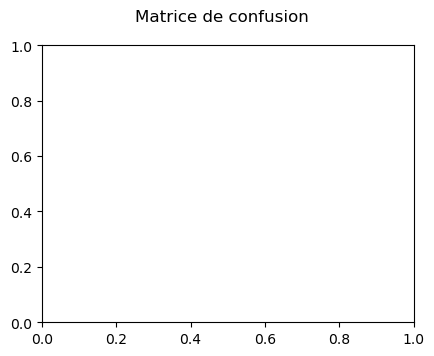

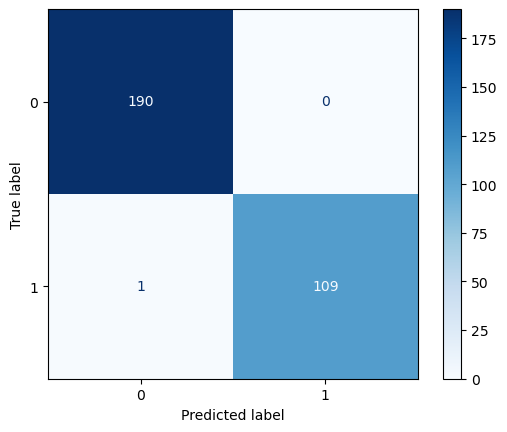

In [62]:
# Matrice de confusion pour le seuil 0.4
fig12, ax12= plt.subplots(figsize=(4.8, 3.6))
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_04, cmap='Blues')

fig12.suptitle('Matrice de confusion')

plt.show()

del fig12, ax12

In [63]:
print("accuracy",accuracy_score(y_test, y_pred_04))

accuracy 0.9966666666666667


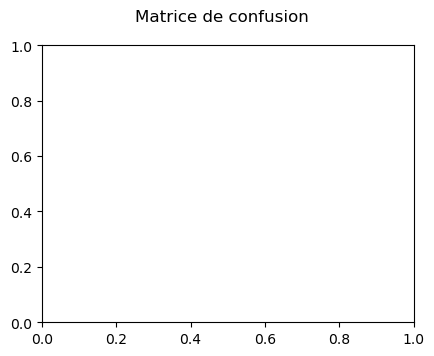

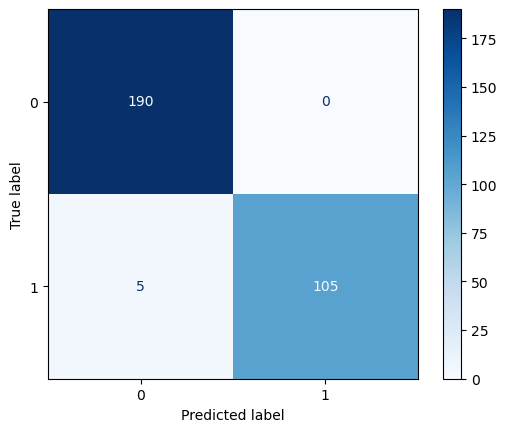

In [64]:
# Matrice de confusion pour le seuil 0.8
fig13, ax13= plt.subplots(figsize=(4.8, 3.6))

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_08, cmap='Blues')

fig13.suptitle('Matrice de confusion')

plt.show()

del fig13, ax13

In [65]:
print("accuracy",accuracy_score(y_test, y_pred_08))

accuracy 0.9833333333333333


### Courbe ROC

Text(0.5, 1.0, 'ROC curve')

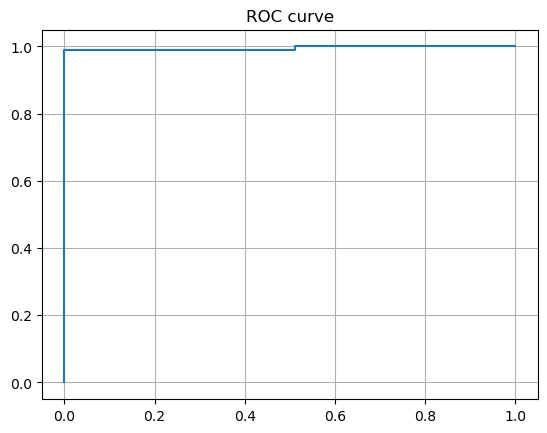

In [66]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, clf_log_reg.predict_proba(X_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.grid()
plt.title("ROC curve")

In [67]:
save_classifier_metrics(y_test, y_pred, 'logistic regression', 1)

accuracy  precision    recall  f1-score
logistic regression  0.996667        1.0  0.990909  0.995434

In [68]:
del y_pred

## 4.2 KMeans

"Le clustering k-means est un algorithme d’apprentissage non supervisé utilisé dans le partitionnement de données, qui regroupe les points de données non étiquetés en groupes, ou clusters"

Nous savons que nous avons 2 clusters de billets : vrais et faux

En fonction du cluster dans lequel se trouvera le billet,  nous pourrons prédire s'il s'agit d'un vrai ou faux.

In [69]:
# Standardisation des données du test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

C:\Users\Daniela\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\Daniela\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\Daniela\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.

C:\Users\Daniela\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to 

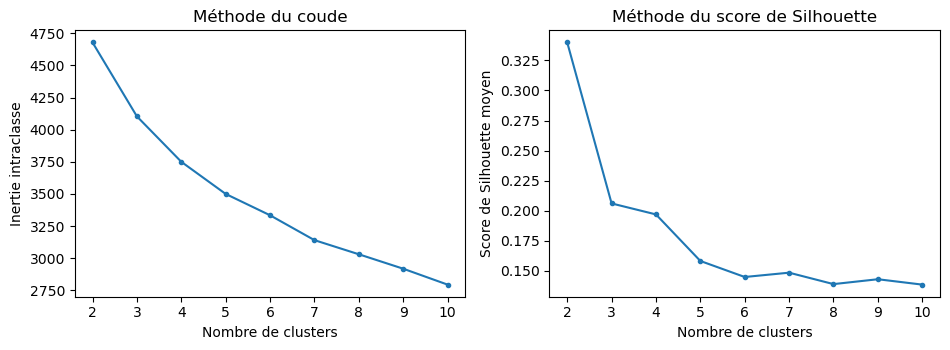

In [70]:
# Initialisation des variables
n_clusters_range = range(2, 11)
inertias=[]
silhouette_avg_scores = []

# Calcul de l'inertie et les score de silhouette moyen pour chaque valeur
# du nombre de clusters
for n_clusters in n_clusters_range:
    clustering = KMeans(n_clusters=n_clusters, n_init='auto', init='k-means++')
    clustering = clustering.fit(X_train_scaled)
    
    inertias.append(clustering.inertia_)

    silhouette_avg = metrics.silhouette_score(
        X_train_scaled, clustering.labels_)
    silhouette_avg_scores.append(silhouette_avg)

# les graphiques
fig14, axs = plt.subplots(1, 2, figsize=(9.6, 3.6))

axs[0].plot(n_clusters_range, inertias, marker='.')
axs[1].plot(n_clusters_range, silhouette_avg_scores, marker='.')

# Définie la position des graduations
axs[0].xaxis.set_major_locator(ticker.IndexLocator(1, 0))
axs[1].xaxis.set_major_locator(ticker.IndexLocator(1, 0))

# Définie les titres des graphiques et de leurs axes
axs[0].set_xlabel('Nombre de clusters')
axs[0].set_ylabel('Inertie intraclasse')
axs[0].set_title('Méthode du coude')
axs[1].set_xlabel('Nombre de clusters')
axs[1].set_ylabel('Score de Silhouette moyen')
axs[1].set_title('Méthode du score de Silhouette')

fig14.tight_layout()

plt.show()

del (n_clusters_range, inertias, silhouette_avg, silhouette_avg_scores,
     n_clusters, clustering, fig14, axs)

Grâce au Score Sihouette qui nous  permet de déterminer le nombre de clusters optimal, nous confirmons donc qu'il faille 2 clusters puique c'est à ce niveau que le score est le plus élevé.

In [71]:
# Le clustering est réalisé avec 2 clusters
clf_kmeans = KMeans(n_clusters=2, init='k-means++', n_init='auto',
                    random_state=42)
clf_kmeans.fit(X_train_scaled)

C:\Users\Daniela\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



KMeans(n_clusters=2, n_init='auto', random_state=42)

In [72]:
# Voici les scores de classification
print("score", clf_kmeans.score(X_train_scaled))
print("silhouette_score: ", silhouette_score(X_train_scaled,clf_kmeans.labels_ ))

score -4678.982323091981
silhouette_score:  0.3399312903668748


## Evaluation du Modèle

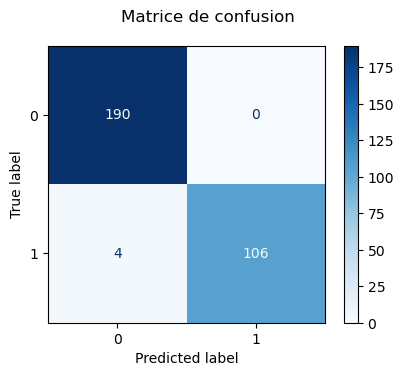

In [73]:
# Normalisation des données test
X_test_scaled = scaler.transform(X_test)

# Prédiction sur les données test
y_pred = clf_kmeans.predict(X_test_scaled)

# Matrice de confusion
fig16, ax16 = plt.subplots(figsize=(4.8, 3.6))

metrics.ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, ax=ax16, cmap='Blues')

fig16.suptitle('Matrice de confusion')

plt.show()

del fig16, ax16

La matrice de confusion dit ceci :

- Les vrais positifs : pour 106 billets, nous avons correctement prédit qu'ils sont faux. 
- Les vrais négatifs : pour 190 billets, nous avons correctement prédit qu'ils sont authentiques. 
- Les faux positifs : absent.
- Les faux négatifs : pour 4 billets, nous avons prédit à tort qu'il sont authentiques.

In [74]:
save_classifier_metrics(y_test, y_pred, 'k-means', 1)

accuracy  precision    recall  f1-score
logistic regression  0.996667        1.0  0.990909  0.995434
k-means              0.986667        1.0  0.963636  0.981481

In [75]:
del y_pred

## 4.3 KNN

K-Nearest Neighbors (KNN) est un type d'apprentissage supervisé qui peut être utilisé pour la classification et la régression. KNN fonctionne en trouvant les 'K' échantillons les plus proches dans l'ensemble de données d'apprentissage d'un nouvel échantillon non classé. L'échantillon non classé est ensuite classé basé sur la majorité des classes des 'K' échantillons les plus proches.

In [76]:
# Standardisation des données test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [77]:
# Liste des valeurs de k à tester
k_values = list(range(1, 30))

In [78]:
# Création de l'instance du classificateur KNN
knn = KNeighborsClassifier()

# Paramètres pour la recherche de grille
param_grid = {'n_neighbors': k_values}



### GridSearchCV + Validation Croisée

In [79]:
# Recherche de grille avec validation croisée
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Extraction des scores de validation croisée et des valeurs de k correspondantes
cv_scores = grid_search.cv_results_['mean_test_score']
best_k = grid_search.best_params_['n_neighbors']
print(best_k)
print(grid_search.best_score_)

3
0.99


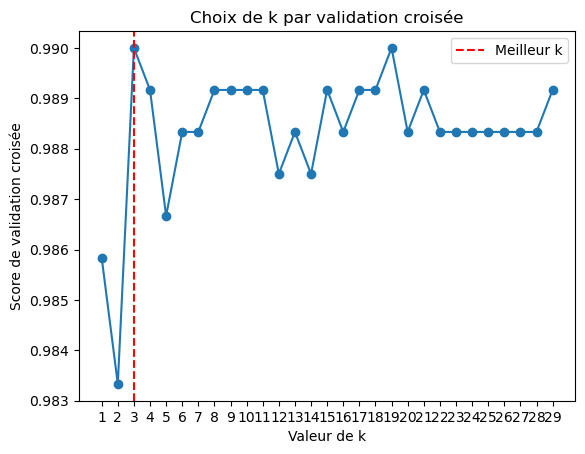

In [80]:
# Tracé du graphique des scores de validation croisée en fonction de k
plt.plot(k_values, cv_scores, '-o')
plt.xlabel('Valeur de k')
plt.ylabel('Score de validation croisée')
plt.title('Choix de k par validation croisée')
plt.xticks(k_values)
plt.axvline(x=best_k, color='r', linestyle='--', label='Meilleur k')
plt.legend()
plt.show()


## Evaluation du Modèle

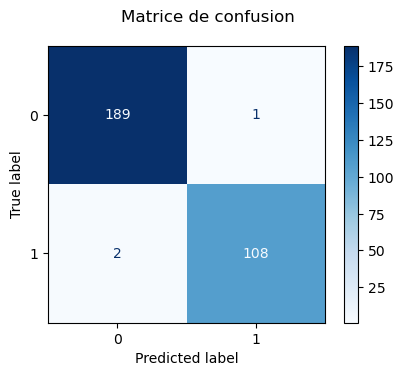

In [81]:
# Standardisation des données train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#KNN
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train_scaled, y_train)

# Normalisation des données test
X_test_scaled = scaler.transform(X_test)

# la prédiction sur les données test
y_pred = clf_knn.predict(X_test_scaled)

# Traçage de la matrice de confusion
fig17, ax17 = plt.subplots(figsize=(4.8, 3.6))

metrics.ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, ax=ax17, cmap='Blues')

fig17.suptitle('Matrice de confusion')

plt.show()

del fig17, ax17

La matrice de confusion dit ceci :

- Les vrais positifs : pour 108 billets, nous avons correctement prédit qu'ils sont faux.
- Les vrais négatifs : pour 189 billets, nous avons correctement prédit qu'ils sont authentiques.
- Les faux positifs : pour 1 billet, nous avons prédit à tort qu'il est faux.
- Les faux négatifs : pour 2 billets, nous avons prédit à tort qu'ils sont authentiques.

In [82]:
save_classifier_metrics(y_test, y_pred, 'knn + gridsearch cv', 1)

accuracy  precision    recall  f1-score
logistic regression  0.996667   1.000000  0.990909  0.995434
k-means              0.986667   1.000000  0.963636  0.981481
knn + gridsearch cv  0.990000   0.990826  0.981818  0.986301

In [83]:
del y_pred

## 4.4 Random Forest

"La forêt d’arbres décisionnels est un algorithme de machine learning couramment utilisé, qui combine les résultats de plusieurs arbres de decision pour obtenir un résultat unique."

"Lors de l'utilisation d'une forêt aléatoire, certains paramètres sont essentiels à optimiser pour obtenir de bonnes performances du modèle. Voici les paramètres les plus importants à prendre en compte :

-n_estimators : Il s'agit du nombre d'arbres de décision dans la forêt aléatoire. Augmenter ce nombre peut améliorer les performances du modèle, mais cela entraîne également une augmentation du temps de calcul.

-max_depth : C'est la profondeur maximale de chaque arbre de décision. Une valeur plus élevée permet à l'arbre d'apprendre des relations plus complexes dans les données, mais elle peut également conduire à un surajustement. Il est important de trouver un équilibre pour éviter l'overfitting.

-min_samples_split : Ce paramètre définit le nombre minimum d'échantillons requis pour scinder un nœud. Une valeur plus élevée peut conduire à des arbres plus simples et éviter l'overfitting, mais cela peut également entraîner une sous-représentation des informations dans les données.

Il est recommandé d'utiliser des techniques d'optimisation telles que la recherche par grille (GridSearch) ou la recherche aléatoire (RandomizedSearch) pour explorer différentes combinaisons de ces paramètres et trouver ceux qui fournissent les meilleures performances pour votre problème spécifique."

### GridSearchCV + Validation Croisée

In [84]:
# Les hyperparamètres à tester à l'aide de GridSearch
param_grid = {
    'n_estimators': [50,100,150,200,250,300,350,400],
    'max_depth': [1,2,3,4,6,7,8,9,10]
}

# Création d' un modèle de forêt aléatoire
rf_model = RandomForestClassifier(oob_score=True, random_state=42)

# GridSearch pour trouver les meilleurs paramètres
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Les meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)

Meilleurs paramètres : {'max_depth': 6, 'n_estimators': 50}


In [85]:
# Créeation d'un modèle de forêt aléatoire avec les meilleurs paramètres
random_forest = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], oob_score=True, random_state=42)

# Entraînement du modèle sur les données d'entraînement
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=50, oob_score=True,
                       random_state=42)

In [86]:
# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluation du Modèle

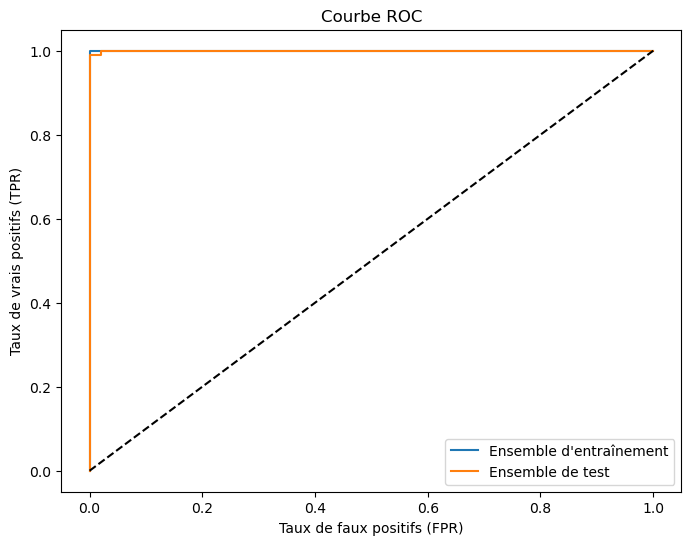

In [87]:
# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest.predict_proba(X_train)[:, 1]
y_test_prob = random_forest.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Ensemble d\'entraînement')
plt.plot(test_fpr, test_tpr, label='Ensemble de test')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

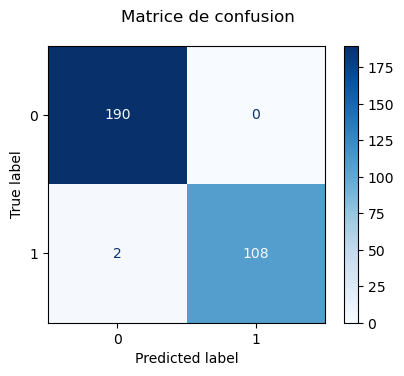

In [88]:
# Traçage de la matrice de confusion
fig18, ax18 = plt.subplots(figsize=(4.8, 3.6))

metrics.ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred, ax=ax18, cmap='Blues')

fig18.suptitle('Matrice de confusion')

plt.show()

del fig18, ax18

La matrice de confusion dit ceci :

- Les vrais positifs : pour 108 billets, nous avons correctement prédit qu'ils sont faux.
- Les vrais négatifs : pour 190 billets, nous avons correctement prédit qu'ils sont authentiques.
- Les faux positifs : aucun.
- Les faux négatifs : pour 2 billets, nous avons prédit à tort qu'ils sont authentiques.

In [89]:
save_classifier_metrics(y_test, y_test_pred, 'random forest + gridsearch cv', 1)

accuracy  precision    recall  f1-score
logistic regression            0.996667   1.000000  0.990909  0.995434
k-means                        0.986667   1.000000  0.963636  0.981481
knn + gridsearch cv            0.990000   0.990826  0.981818  0.986301
random forest + gridsearch cv  0.993333   1.000000  0.981818  0.990826

In [90]:
del y_test_pred

<div style="background-color: RGB(202,204,182);" >
<h2 style="margin: auto; padding: 30px; color:#fff; ">Etape 5 - Choix du Modèle</h2>
</div>

*PARTIE RESERVEE AU CHOIX DU MODELE LE PLUS PERFORMANT*

In [91]:
pd.DataFrame(clf_metrics_dict).style.background_gradient()

Nous optons pour le choix du Modèle de Rgéression logistique : il est le modèle ayant les meilleurs résultats sur la totalité des métriques de performance. Il dispose du meilleur pourcentage de billets bien classés (accuracy), la meilleure capacité à ne pas se tromper lorsqu'elle identifie de faux billets (precision) et la plus forte capacité à repérer les faux billets(recall).



In [92]:
# Sauvegarde de l'algorithme retenu
joblib.dump(clf_log_reg, 'logistic-regression-gs.joblib')

['logistic-regression-gs.joblib']